In [1]:
%matplotlib inline

import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data, info = tfds.load("cifar10", with_info=True, in_memory=True, shuffle_files=False, 
                       data_dir="F:\\Tensorflow datasets")

test_x, test_y = zip(*[(datum['image'].numpy(), datum['label']) for datum in data['test'] if datum['label'] in [0, 1]])
train_x, train_y = zip(*[(datum['image'].numpy(), datum['label']) for datum in data['train'] if datum['label'] in [0, 1]])
test_x = np.array(test_x)
test_y = np.array(tf.one_hot(test_y, 2))
train_x = np.array(train_x)
train_y = np.array(tf.one_hot(train_y, 2))

(2000, 32, 32, 3)
(10000, 32, 32, 3)
2000
[1. 0.]


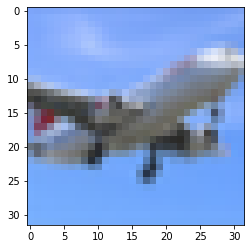

In [3]:
print(test_x.shape)
print(train_x.shape)
print(len(test_y))
print(test_y[1])

plt.imshow(test_x[1])
plt.show()

In [4]:
train_len = len(train_x)
test_len = len(test_x)

num_features = 32 * 32 * 3 + 1

w = np.random.rand(num_features, 2)

inputs = np.resize(train_x, (train_len, num_features - 1)) / 255
inputs = np.append(inputs, np.ones((train_len, 1)), axis=1) # adding bias dimension

labels = train_y

print(inputs.shape)
print(labels.shape)

(10000, 3073)
(10000, 2)


In [5]:
num_epochs = 500
lr = 1e-4

In [6]:
# training loop
for epoch_id in range(num_epochs):
    outputs = np.matmul(inputs, w)                # n x 2
    diff = (outputs - labels)                     # n x 2
    mse_loss = np.square(diff) / train_len        # n x 2
    grads = np.matmul(inputs.T, diff) / train_len # d x 2
    w = w - grads * lr
    
    print('Epoch = {}, loss = {}'.format(epoch_id, np.sum(mse_loss)))

Epoch = 0, loss = 1299817.9696794732
Epoch = 1, loss = 1084792.7021643275
Epoch = 2, loss = 905345.9754504459
Epoch = 3, loss = 755590.8589388152
Epoch = 4, loss = 630614.4911030137
Epoch = 5, loss = 526316.9071184283
Epoch = 6, loss = 439276.5345521225
Epoch = 7, loss = 366637.9445365871
Epoch = 8, loss = 306018.17596870614
Epoch = 9, loss = 255428.5595858493
Epoch = 10, loss = 213209.47726324495
Epoch = 11, loss = 177975.9162323808
Epoch = 12, loss = 148572.0320606386
Epoch = 13, loss = 124033.22977568873
Epoch = 14, loss = 103554.51916001484
Epoch = 15, loss = 86464.10607268494
Epoch = 16, loss = 72201.35342970185
Epoch = 17, loss = 60298.388826205824
Epoch = 18, loss = 50364.75541630371
Epoch = 19, loss = 42074.60250405129
Epoch = 20, loss = 35155.99561741477
Epoch = 21, loss = 29381.995369242977
Epoch = 22, loss = 24563.212436481866
Epoch = 23, loss = 20541.594414709103
Epoch = 24, loss = 17185.240718228106
Epoch = 25, loss = 14384.075422240485
Epoch = 26, loss = 12046.23608944447

Epoch = 216, loss = 128.39532889064265
Epoch = 217, loss = 127.9418139422635
Epoch = 218, loss = 127.4901713904121
Epoch = 219, loss = 127.0403932726808
Epoch = 220, loss = 126.59247166094075
Epoch = 221, loss = 126.14639866119323
Epoch = 222, loss = 125.70216641342179
Epoch = 223, loss = 125.2597670914447
Epoch = 224, loss = 124.81919290276844
Epoch = 225, loss = 124.38043608844157
Epoch = 226, loss = 123.94348892290928
Epoch = 227, loss = 123.50834371386864
Epoch = 228, loss = 123.07499280212448
Epoch = 229, loss = 122.64342856144573
Epoch = 230, loss = 122.21364339842263
Epoch = 231, loss = 121.78562975232447
Epoch = 232, loss = 121.3593800949578
Epoch = 233, loss = 120.9348869305255
Epoch = 234, loss = 120.51214279548631
Epoch = 235, loss = 120.09114025841504
Epoch = 236, loss = 119.67187191986329
Epoch = 237, loss = 119.25433041222092
Epoch = 238, loss = 118.83850839957806
Epoch = 239, loss = 118.42439857758762
Epoch = 240, loss = 118.01199367332859
Epoch = 241, loss = 117.6012864

Epoch = 435, loss = 62.70492689511474
Epoch = 436, loss = 62.518965914805634
Epoch = 437, loss = 62.33374579224607
Epoch = 438, loss = 62.149263421248264
Epoch = 439, loss = 61.96551570889227
Epoch = 440, loss = 61.78249957546866
Epoch = 441, loss = 61.60021195442164
Epoch = 442, loss = 61.41864979229224
Epoch = 443, loss = 61.23781004866197
Epoch = 444, loss = 61.05768969609642
Epoch = 445, loss = 60.87828572008938
Epoch = 446, loss = 60.69959511900707
Epoch = 447, loss = 60.52161490403263
Epoch = 448, loss = 60.34434209911086
Epoch = 449, loss = 60.167773740893196
Epoch = 450, loss = 59.991906878682926
Epoch = 451, loss = 59.8167385743806
Epoch = 452, loss = 59.64226590242984
Epoch = 453, loss = 59.468485949763135
Epoch = 454, loss = 59.295395815748044
Epoch = 455, loss = 59.122992612133636
Epoch = 456, loss = 58.951273462997044
Epoch = 457, loss = 58.78023550469037
Epoch = 458, loss = 58.60987588578776
Epoch = 459, loss = 58.440191767032715
Epoch = 460, loss = 58.27118032128566
Epoc

In [7]:
print(outputs)
print(mse_loss)
print(grads)

[[-6.59324122 -4.12774528]
 [ 6.80141453  7.3900521 ]
 [ 4.25296387  2.20707315]
 ...
 [ 1.98593542 -3.54469528]
 [-3.2242687  -5.42743108]
 [-0.57730302  2.69288   ]]
[[5.76573122e-03 1.70382811e-03]
 [3.36564105e-03 5.46128700e-03]
 [1.80877016e-03 1.45702558e-04]
 ...
 [9.72068644e-05 1.25648646e-03]
 [1.78444461e-03 2.94570081e-03]
 [3.33278773e-05 2.86584268e-04]]
[[-0.32049673 -0.51917575]
 [-0.40110742 -0.55942747]
 [-0.47951097 -0.59961595]
 ...
 [-0.11401108  0.0778195 ]
 [-0.17568549  0.0756184 ]
 [ 0.32041263  0.20375875]]
